In [1]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
import os

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [ ]:
pd.read_csv('synthetic_heart_disease_dataset.csv')


,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,48,Male,78,157,26.4,Never,NaN,Sedentary,Healthy,Medium,...,0,1,1,0,104,99,71,165,200,0
1,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,0,1,1,0,111,72,60,145,206,0
2,79,Female,88,152,32.3,Never,NaN,Moderate,Average,Medium,...,0,0,1,0,116,102,78,148,208,0
3,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,0,1,0,0,171,92,109,105,290,1
4,34,Female,65,191,18.5,Current,NaN,Sedentary,Healthy,Low,...,1,0,0,0,164,67,108,116,220,1


In [3]:
df = pd.read_csv('synthetic_heart_disease_dataset.csv')
df.head()

,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,48,Male,78,157,26.4,Never,NaN,Sedentary,Healthy,Medium,...,0,1,1,0,104,99,71,165,200,0
1,35,Female,73,163,33.0,Never,Low,Active,Average,High,...,0,1,1,0,111,72,60,145,206,0
2,79,Female,88,152,32.3,Never,NaN,Moderate,Average,Medium,...,0,0,1,0,116,102,78,148,208,0
3,75,Male,106,171,37.4,Never,Moderate,Moderate,Average,Low,...,0,1,0,0,171,92,109,105,290,1
4,34,Female,65,191,18.5,Current,NaN,Sedentary,Healthy,Low,...,1,0,0,0,164,67,108,116,220,1


In [4]:
df.shape

(50000, 21)

In [5]:
df.dtypes

Age                        int64
Gender                    object
Weight                     int64
Height                     int64
BMI                      float64
Smoking                   object
Alcohol_Intake            object
Physical_Activity         object
Diet                      object
Stress_Level              object
Hypertension               int64
Diabetes                   int64
Hyperlipidemia             int64
Family_History             int64
Previous_Heart_Attack      int64
Systolic_BP                int64
Diastolic_BP               int64
Heart_Rate                 int64
Blood_Sugar_Fasting        int64
Cholesterol_Total          int64
Heart_Disease              int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  object 
 2   Weight                 50000 non-null  int64  
 3   Height                 50000 non-null  int64  
 4   BMI                    50000 non-null  float64
 5   Smoking                50000 non-null  object 
 6   Alcohol_Intake         29891 non-null  object 
 7   Physical_Activity      50000 non-null  object 
 8   Diet                   50000 non-null  object 
 9   Stress_Level           50000 non-null  object 
 10  Hypertension           50000 non-null  int64  
 11  Diabetes               50000 non-null  int64  
 12  Hyperlipidemia         50000 non-null  int64  
 13  Family_History         50000 non-null  int64  
 14  Previous_Heart_Attack  50000 non-null  int64  
 15  Sy

In [7]:
df.isna().sum()

Age                          0
Gender                       0
Weight                       0
Height                       0
BMI                          0
Smoking                      0
Alcohol_Intake           20109
Physical_Activity            0
Diet                         0
Stress_Level                 0
Hypertension                 0
Diabetes                     0
Hyperlipidemia               0
Family_History               0
Previous_Heart_Attack        0
Systolic_BP                  0
Diastolic_BP                 0
Heart_Rate                   0
Blood_Sugar_Fasting          0
Cholesterol_Total            0
Heart_Disease                0
dtype: int64

In [8]:
# Display rows with missing values
df[df.isna().any(axis=1)]

,Age,Gender,Weight,Height,BMI,Smoking,Alcohol_Intake,Physical_Activity,Diet,Stress_Level,...,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
0,48,Male,78,157,26.4,Never,NaN,Sedentary,Healthy,Medium,...,0,1,1,0,104,99,71,165,200,0
2,79,Female,88,152,32.3,Never,NaN,Moderate,Average,Medium,...,0,0,1,0,116,102,78,148,208,0
4,34,Female,65,191,18.5,Current,NaN,Sedentary,Healthy,Low,...,1,0,0,0,164,67,108,116,220,1
5,50,Male,116,186,25.3,Current,NaN,Sedentary,Average,Medium,...,0,1,0,0,171,91,106,97,225,0
7,51,Male,75,176,18.2,Former,NaN,Active,Average,Medium,...,0,0,1,0,117,63,89,143,154,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49985,54,Male,113,190,19.4,Current,NaN,Moderate,Average,Low,...,1,0,1,0,113,90,108,122,225,0
49986,46,Female,54,167,36.2,Never,NaN,Moderate,Average,Medium,...,0,1,0,0,108,108,70,83,291,1
49989,37,Male,117,178,30.4,Never,NaN,Moderate,Healthy,Low,...,0,1,0,0,138,89,102,99,230,0
49994,62,Male,91,197,36.8,Never,NaN,Active,Unhealthy,Low,...,0,0,1,0,117,80,106,97,270,1


In [20]:
categorical_cols = [
    'Gender',
    'Smoking',
    'Alcohol_Intake',
    'Physical_Activity',
    'Diet',
    'Stress_Level'
]

# Fill missing
df[categorical_cols] = df[categorical_cols].fillna("None").astype(str)

In [21]:
df.isna().sum()

Age                      0
Gender                   0
Weight                   0
Height                   0
BMI                      0
Smoking                  0
Alcohol_Intake           0
Physical_Activity        0
Diet                     0
Stress_Level             0
Hypertension             0
Diabetes                 0
Hyperlipidemia           0
Family_History           0
Previous_Heart_Attack    0
Systolic_BP              0
Diastolic_BP             0
Heart_Rate               0
Blood_Sugar_Fasting      0
Cholesterol_Total        0
Heart_Disease            0
dtype: int64

In [22]:
df.describe()

,Age,Weight,Height,BMI,Hypertension,Diabetes,Hyperlipidemia,Family_History,Previous_Heart_Attack,Systolic_BP,Diastolic_BP,Heart_Rate,Blood_Sugar_Fasting,Cholesterol_Total,Heart_Disease
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.46406,84.547520,174.460000,28.984284,0.299620,0.199260,0.251660,0.400500,0.099280,139.299580,89.528800,84.449560,124.493020,224.556360,0.463460
std,14.43809,20.213257,14.420379,6.367494,0.458096,0.399448,0.433971,0.490005,0.299041,23.083544,17.258063,14.491325,31.691507,43.157467,0.498668
min,30.00000,50.000000,150.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,60.000000,60.000000,70.000000,150.000000,0.000000
25%,42.00000,67.000000,162.000000,23.500000,0.000000,0.000000,0.000000,0.000000,0.000000,119.000000,75.000000,72.000000,97.000000,187.000000,0.000000
50%,54.00000,85.000000,174.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,139.000000,90.000000,85.000000,125.000000,225.000000,0.000000
75%,67.00000,102.000000,187.000000,34.500000,1.000000,0.000000,1.000000,1.000000,0.000000,159.000000,104.000000,97.000000,152.000000,262.000000,1.000000
max,79.00000,119.000000,199.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,109.000000,179.000000,299.000000,1.000000


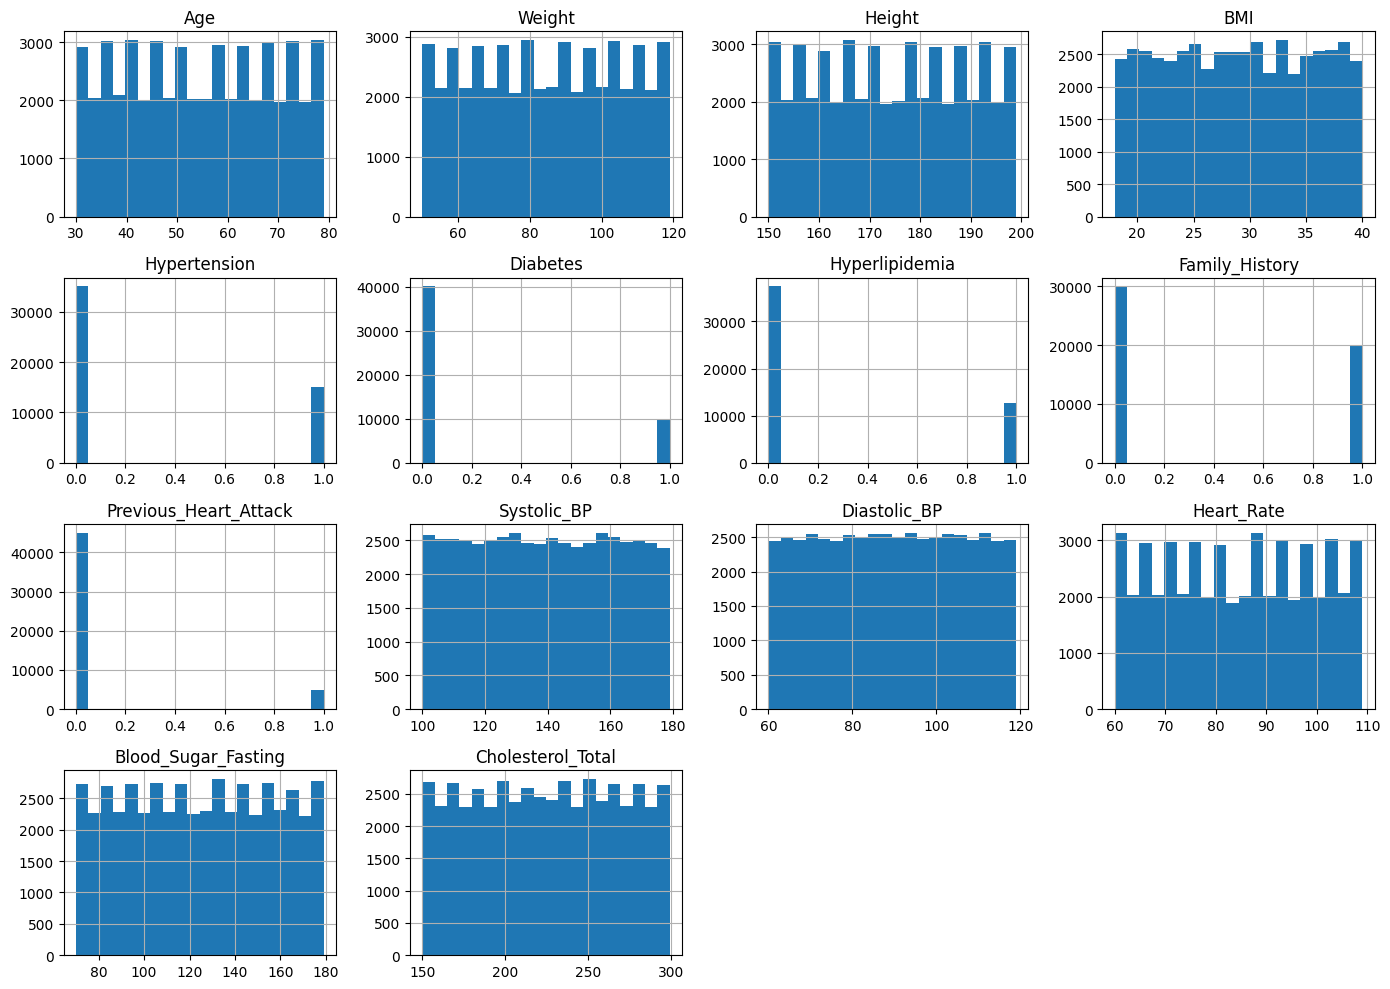

In [23]:
# data visualization
# 6a. Numeric Features - Histograms
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('Heart_Disease')  # Exclude target if needed

df[numeric_cols].hist(bins=20, figsize=(14,10))
plt.tight_layout()
plt.show()

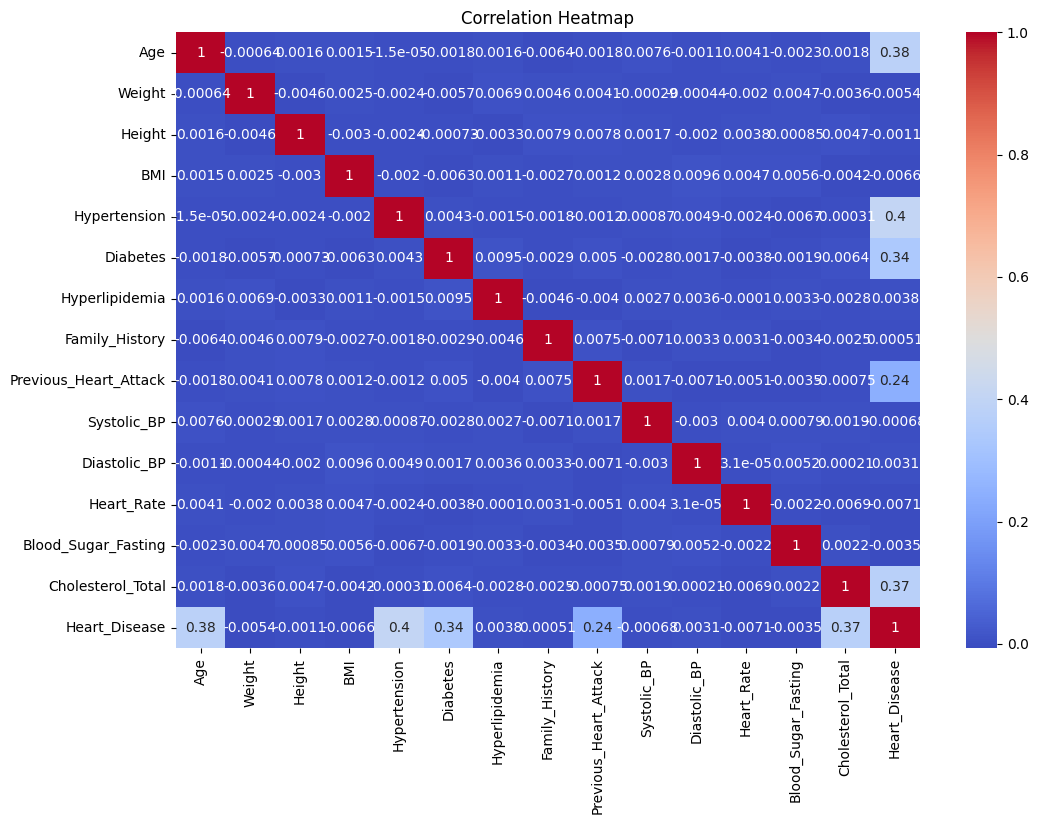

In [24]:
# 6b. Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols + ['Heart_Disease']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

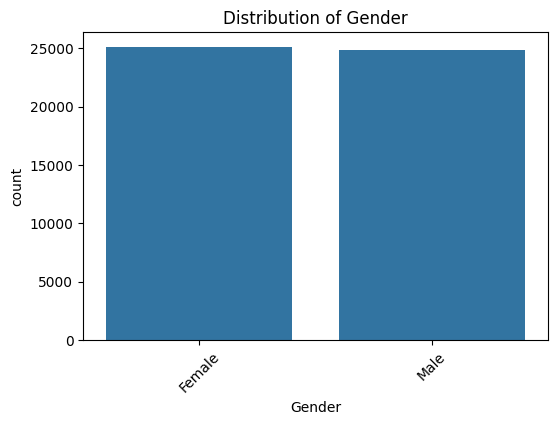

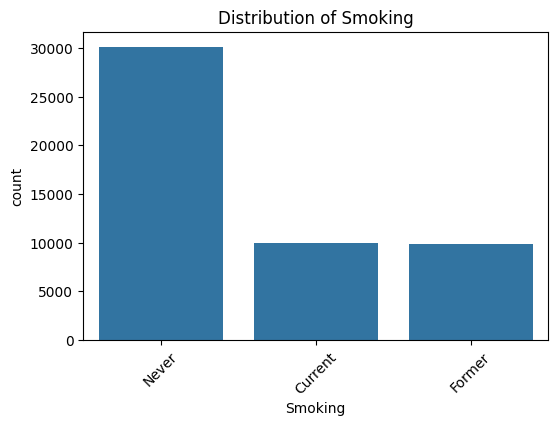

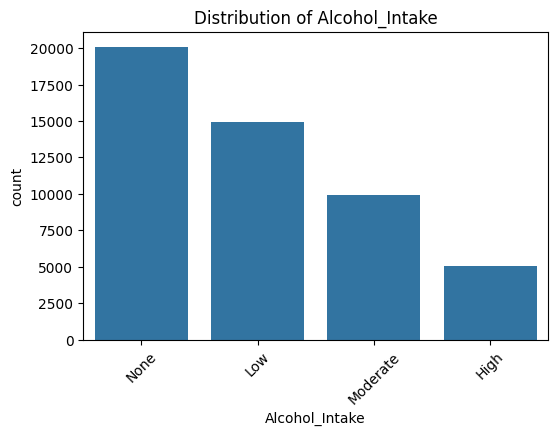

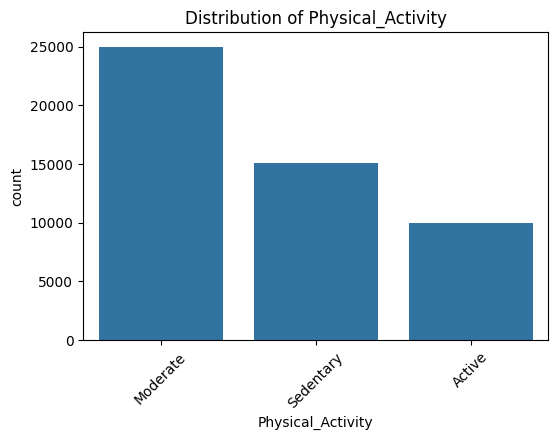

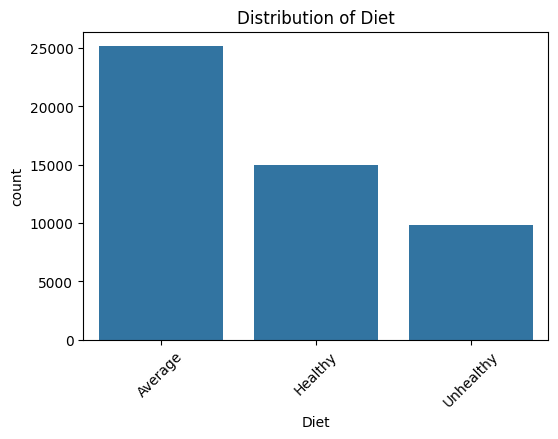

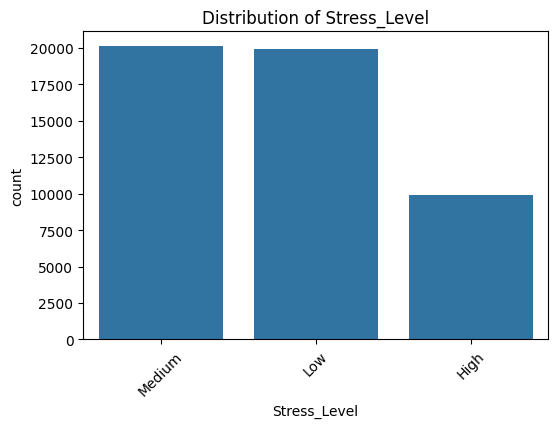

In [25]:
# 6c. Categorical Features - Countplots
categorical_cols = ['Gender', 'Smoking', 'Alcohol_Intake', 'Physical_Activity', 'Diet', 'Stress_Level']

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()

In [26]:
# One hot encoding categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

In [27]:
# Train / Test Split
X = df_encoded.drop("Heart_Disease", axis=1)
y = df_encoded["Heart_Disease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [28]:
# Scale numerical features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 2: Logistic Regression
1.Fit a Logistic Regression Model that uses default hyperparameters.
2Tune the hyperparameters of your logistic regression model
3.Report accuracy, precision, recall & F1 score after tuning your threshold to maximize F1 Score
4.Plot the ROC curve and report AUC for your tuned model

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, solver="saga", n_jobs=-1)

lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")
print(f"Test Accuracy: {lr.score(X_test, y_test)}")

Train Accuracy: 0.91495
Test Accuracy: 0.9142


In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "C": np.linspace(.1, 1.1, 11),
    "penalty": ["l1", "l2"],
}

gridsearch = GridSearchCV(LogisticRegression(solver="saga", max_iter=1000), parameters)

gridsearch.fit(X_train_scaled, y_train)

gridsearch.best_params_ 

{'C': np.float64(0.1), 'penalty': 'l1'}

In [35]:
logreg = LogisticRegression(solver='saga', max_iter=5000, **gridsearch.best_params_)

lr_tuned = logreg.fit(X_train_scaled, y_train)

print(f"Train Accuracy: {lr_tuned.score(X_train_scaled, y_train)}")
print(f"Test Accuracy: {lr_tuned.score(X_test_scaled, y_test)}")

Train Accuracy: 0.925225
Test Accuracy: 0.9237


<Axes: >

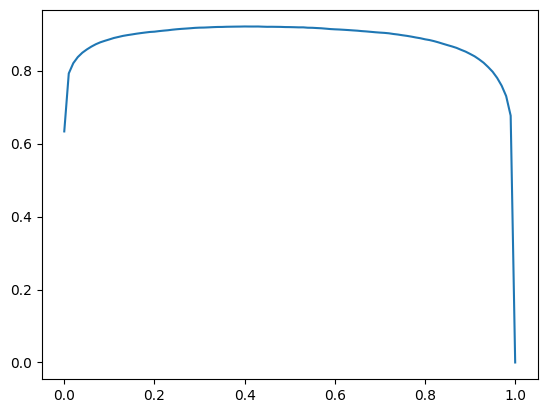

In [36]:
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr_tuned.predict_proba(X_train_scaled)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1)

In [37]:
thresh = thresholds[f1.index(max(f1))]

thresh

np.float64(0.4)

In [38]:
preds = lr_tuned.predict_proba(X_test_scaled)[:, 1] > thresh

print(f"Accuracy: {accuracy_score(y_test, preds)}")
print(f"Precision: {precision_score(y_test, preds)}")
print(f"Recall: {recall_score(y_test, preds)}")
print(f"F1: {f1_score(y_test, preds)}")

Accuracy: 0.925
Precision: 0.9010943629981416
Recall: 0.9415318230852211
F1: 0.9208693817261026


In [39]:
confusion_matrix(y_test, preds)

array([[4886,  479],
       [ 271, 4364]])

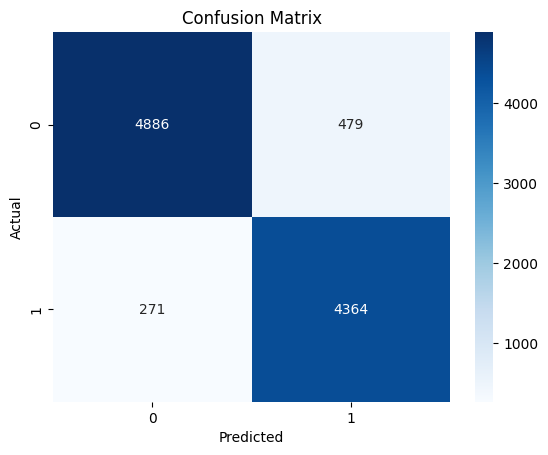

In [40]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show() 

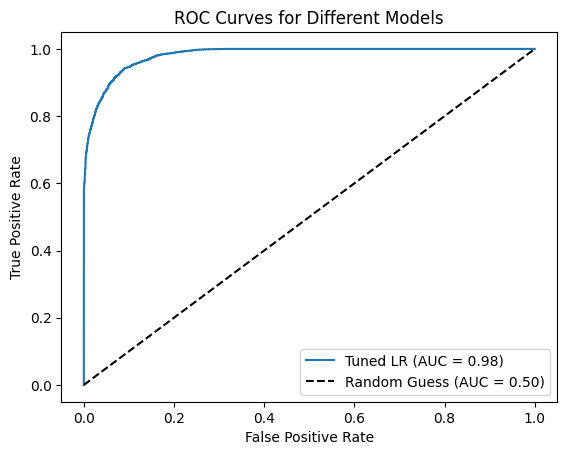

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
    
# Generate ROC AUC for tuned model
y_probs = lr_tuned.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)


# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Tuned LR (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

In [45]:
import joblib

# Save artifacts
joblib.dump(lr_tuned, "lr_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(thresh, "threshold.pkl")
joblib.dump(list(X_train.columns), "columns.pkl")





['columns.pkl']